In [2]:
import mglearn

In [3]:
X, y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X shape: (26, 2)


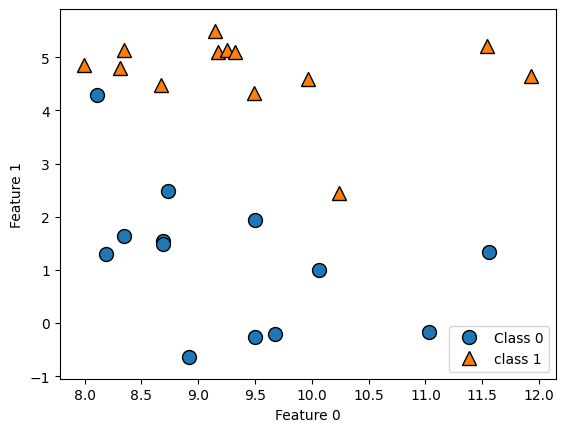

In [5]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "class 1"], loc=4)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("X shape: {}".format(X.shape))

Text(0, 0.5, 'target')

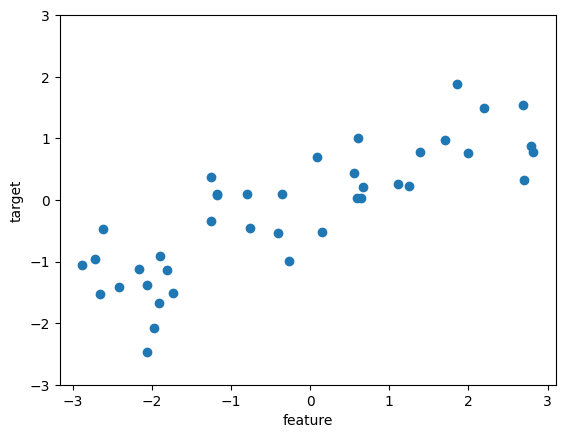

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (19, 2)
Testing set size: (7, 2)


## Creating the model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Predicting test data classes

In [11]:
print("Test data predictions: ", model.predict(X_test))
print("Actual test data classes: ", y_test)

Test data predictions:  [1 0 1 0 1 0 0]
Actual test data classes:  [1 0 1 0 1 1 0]


#### Model evaluation

In [12]:
print(f"Accuracy on training set: {model.score(X_test, y_test):.2f}")

Accuracy on training set: 0.86
